In [13]:
# Import necessary libraries and suppress warnings
import numpy as np
import pandas as pd

import matplotlib
matplotlib.use('Agg')  # Ensures non-interactive backend for matplotlib
import matplotlib.pyplot as plt
plt.switch_backend('Agg')  # Additional backend switch for plt if needed
%matplotlib inline

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import LabelEncoder

# Set aesthetic style for seaborn
sns.set(style='whitegrid')

print('Imports successful.')

Imports successful.


In [14]:
# Load IPL matches data
matches = pd.read_csv('C:/Users/HP/Downloads/matches.csv', encoding='ascii', delimiter=',')

# Convert the date column to datetime (if it's not already)
matches['date'] = pd.to_datetime(matches['date'], errors='coerce')

# Load IPL deliveries data
deliveries = pd.read_csv('C:/Users/HP/Downloads/deliveries.csv', encoding='ascii', delimiter=',')

# Convert the date column to datetime
deliveries['date'] = pd.to_datetime(deliveries['date'], errors='coerce')

# Display basic information about the datasets
print('Matches Dataset Shape:', matches.shape)
print('Deliveries Dataset Shape:', deliveries.shape)

C:\Users\HP\AppData\Local\Temp\ipykernel_4976\1414648406.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  matches['date'] = pd.to_datetime(matches['date'], errors='coerce')


Matches Dataset Shape: (25, 20)
Deliveries Dataset Shape: (5951, 19)


In [15]:
# Check for missing values in matches dataset
print('Missing values in matches dataset:')
print(matches.isnull().sum())

# Check for missing values in deliveries dataset
print('\nMissing values in deliveries dataset:')
print(deliveries.isnull().sum())

# If any missing values are found in the date columns, they are already set to NaT from pd.to_datetime

# As a first step, let's drop any rows in matches where the match_winner is missing, since it is key for our prediction task
matches = matches.dropna(subset=['match_winner'])

# Alternatively, other imputation strategies could be considered for numerical columns.

print('\nAfter cleaning, Matches Dataset Shape:', matches.shape)

Missing values in matches dataset:
match_id                0
date                   25
venue                   0
team1                   0
team2                   0
stage                   0
toss_winner             0
toss_decision           0
first_ings_score        0
first_ings_wkts         0
second_ings_score       0
second_ings_wkts        0
match_winner            0
won_by                  0
balls_left              0
player_of_the_match     0
top_scorer              0
highscore               0
best_bowling            0
best_bowling_figure     0
dtype: int64

Missing values in deliveries dataset:
match_no               0
date                   0
stage                  0
venue                  0
batting_team           0
bowling_team           0
innings                0
over                   0
striker                0
bowler                 0
runs_of_bat            0
extras                 0
wide                   0
legbyes                0
byes                   0
noballs           

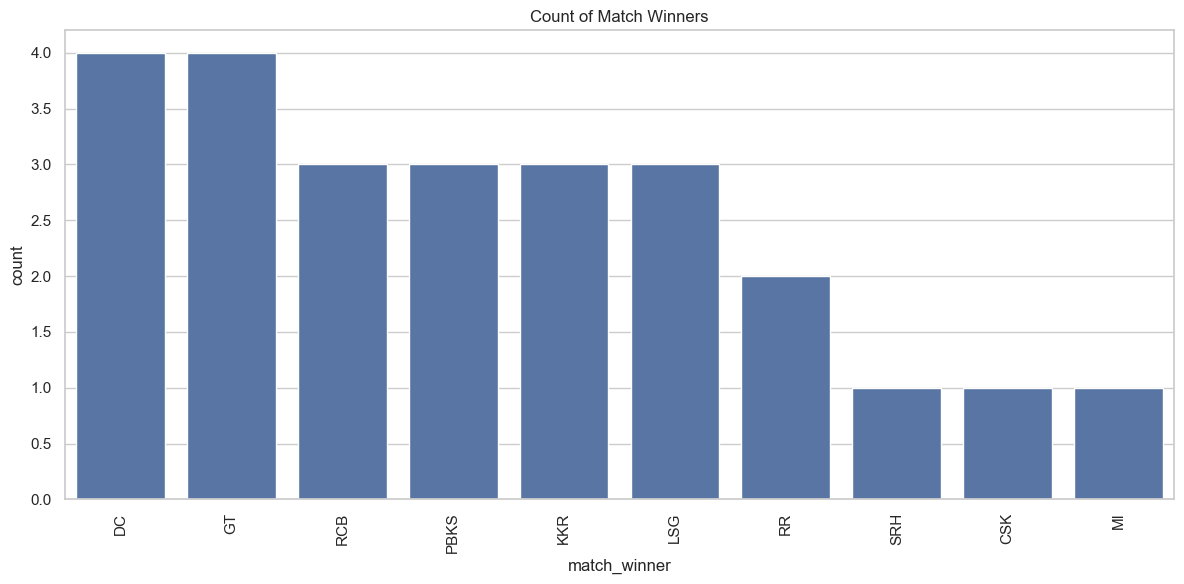

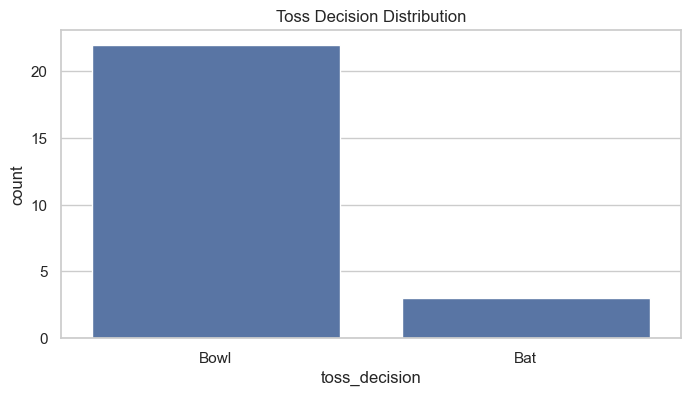

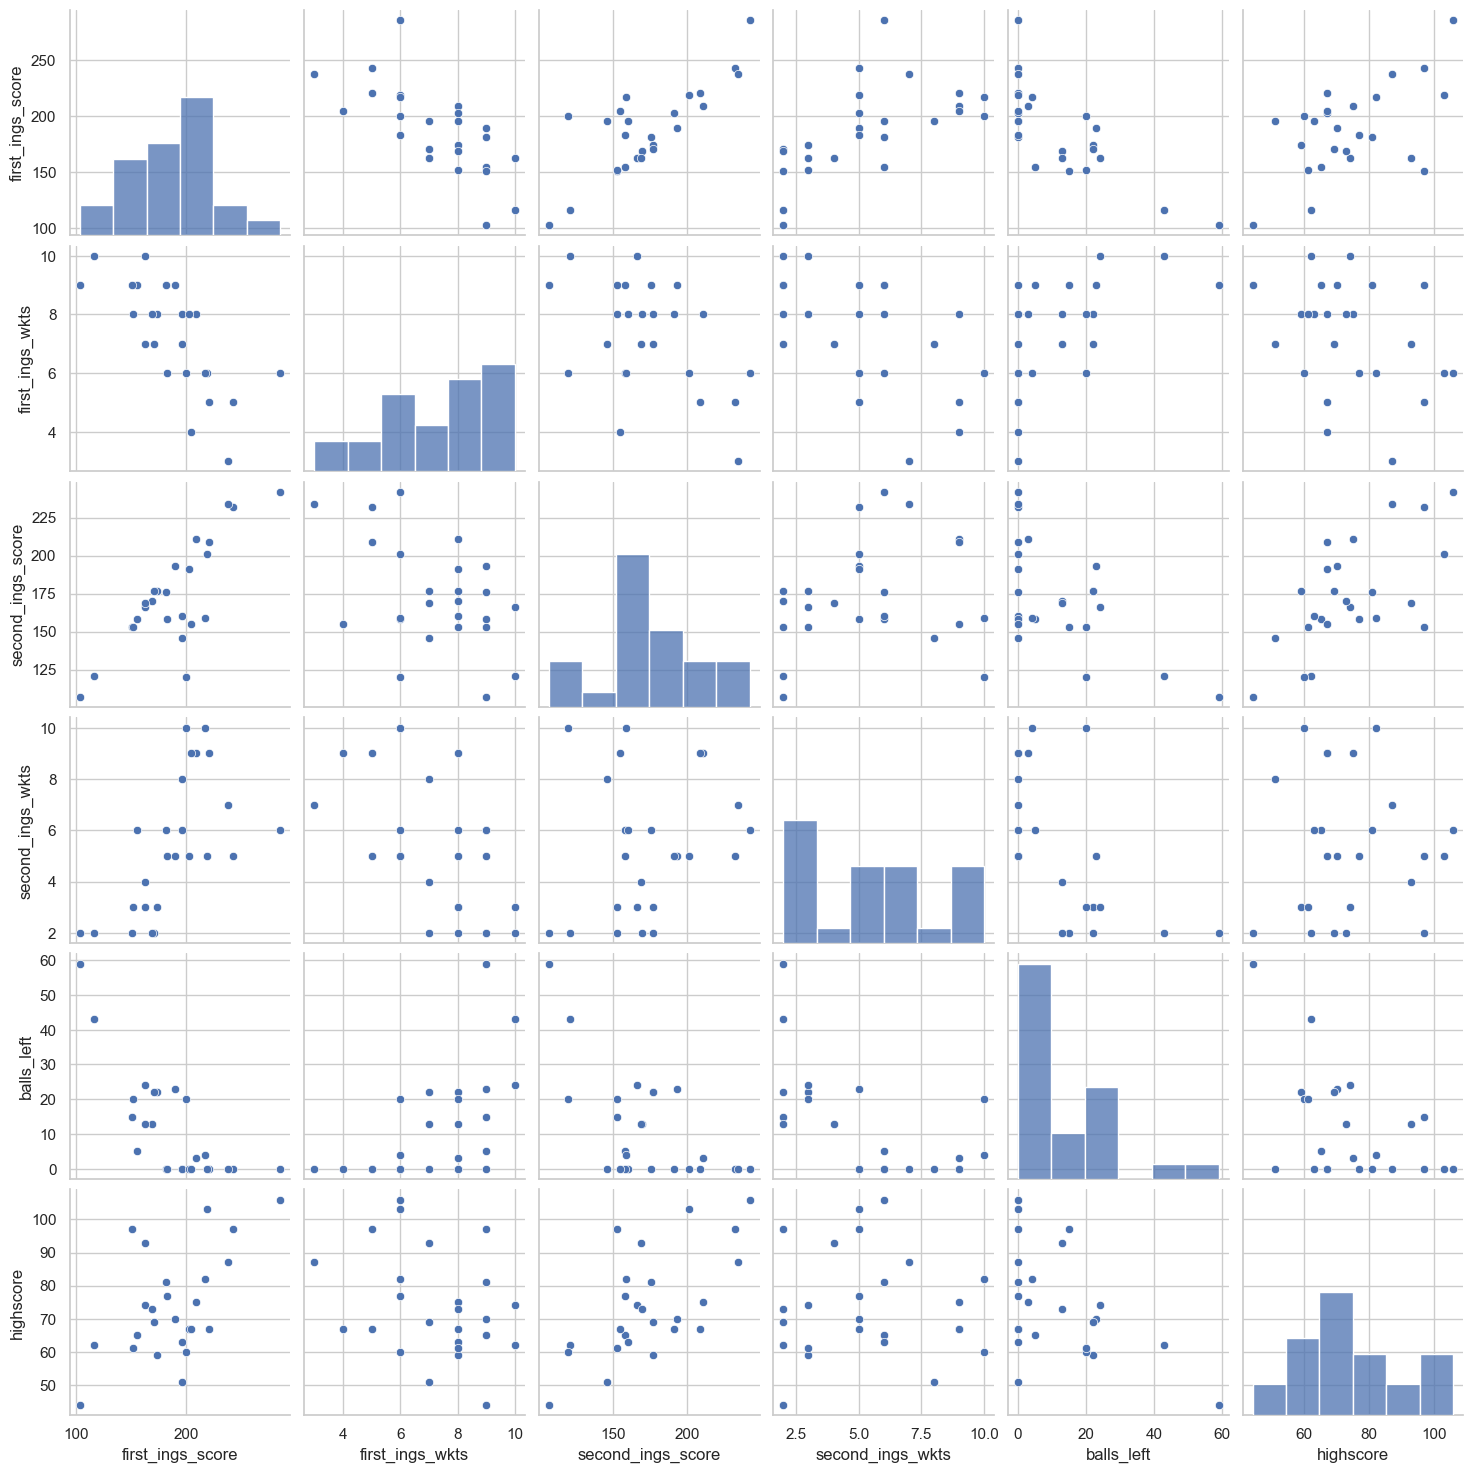

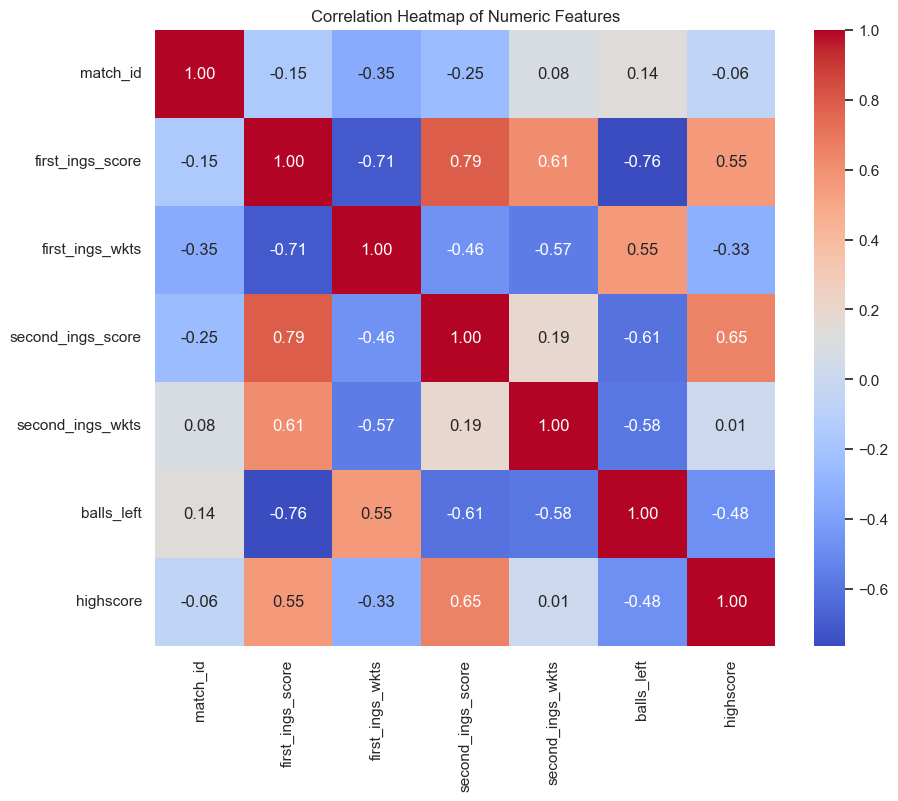

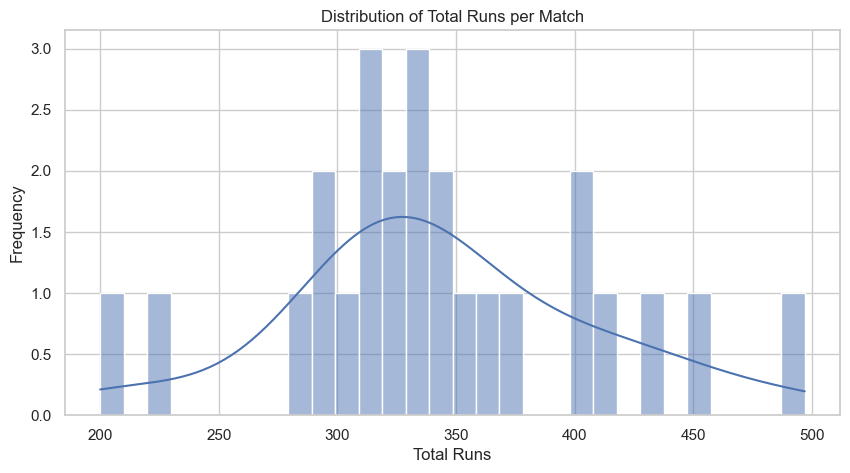

In [16]:
# Univariate Analysis: Countplot for match winners
plt.figure(figsize=(12,6))
sns.countplot(data=matches, x='match_winner', order=matches['match_winner'].value_counts().index)
plt.title('Count of Match Winners')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Distribution of toss decisions
plt.figure(figsize=(8,4))
sns.countplot(data=matches, x='toss_decision')
plt.title('Toss Decision Distribution')
plt.show()

# Pair Plot using selected numeric columns from matches
numeric_cols = ['first_ings_score', 'first_ings_wkts', 'second_ings_score', 'second_ings_wkts', 'balls_left', 'highscore']
sns.pairplot(matches[numeric_cols])
plt.show()

# Correlation Heatmap: Only if we have 4 or more numeric columns
numeric_df = matches.select_dtypes(include=[np.number])
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(10, 8))
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap of Numeric Features')
    plt.show()
else:
    print('Not enough numeric columns to plot a correlation heatmap.')

# Exploring deliveries data: Total runs per match
runs_per_match = deliveries.groupby('match_no')['runs_of_bat'].sum().reset_index()
plt.figure(figsize=(10,5))
sns.histplot(runs_per_match['runs_of_bat'], bins=30, kde=True)
plt.title('Distribution of Total Runs per Match')
plt.xlabel('Total Runs')
plt.ylabel('Frequency')
plt.show()

Prediction Accuracy: 0.125


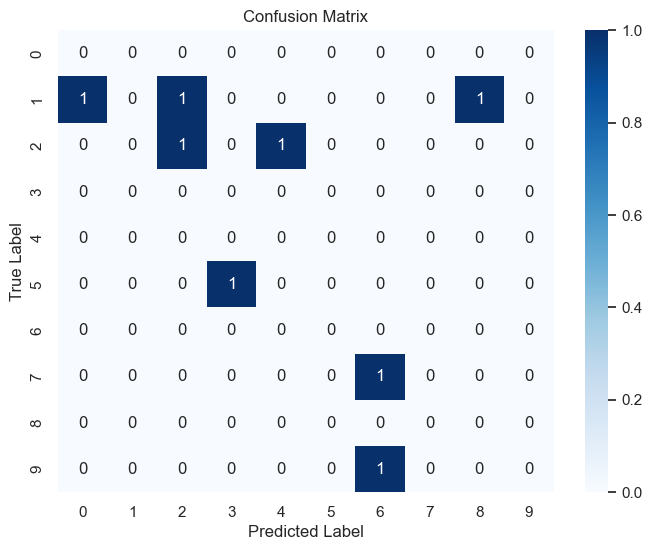

In [17]:
# Prepare the dataset for prediction
predictor_df = matches.copy()

# We'll use the following features: toss_winner, toss_decision, first_ings_score, first_ings_wkts, second_ings_score, second_ings_wkts, balls_left
features = ['toss_winner', 'toss_decision', 'first_ings_score', 'first_ings_wkts', 'second_ings_score', 'second_ings_wkts', 'balls_left']
target = 'match_winner'

# Label encoding for categorical features in X and the target
le = LabelEncoder()
for col in ['toss_winner', 'toss_decision']:
    predictor_df[col] = le.fit_transform(predictor_df[col].astype(str))

# Encode target variable
predictor_df[target] = le.fit_transform(predictor_df[target].astype(str))

# Split the dataset into training and testing sets
X = predictor_df[features]
y = predictor_df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate the model on the test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Prediction Accuracy:', accuracy)

# Plot the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()